<a href="https://colab.research.google.com/github/lgiesen/forest_height/blob/main/notebooks/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# the zipped data is uploaded in the root_path folder
root_path = 'drive/MyDrive/Colab Notebooks/data/'
path_images = f'{root_path}images/'
path_masks = f'{root_path}masks/'
color = "#01748F"
user = "lgiesen"
repo = "forest_height"
!git clone https://github.com/{user}/{repo}.git

Cloning into 'forest_height'...
remote: Enumerating objects: 725, done.
remote: Counting objects: 100% (377/377), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 725 (delta 213), reused 299 (delta 155), pack-reused 348
Receiving objects: 100% (725/725), 46.23 MiB | 21.79 MiB/s, done.
Resolving deltas: 100% (404/404), done.


In [3]:
%run /content/forest_height/src/load_data.py
%run /content/forest_height/src/evaluate_model.py
%run /content/forest_height/src/visualize_data.py

Train and evaluate the model on all sensible data combinations

In [4]:
from sklearn.tree import DecisionTreeRegressor
# initialize model
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
train_evaluate_model(dt)

color_channels
MAE: 9.1269098683888; MSE: 116.50710203425757; RMSE: 3.0210776005241575; MAPE: 1.6158381177929064
color_channels_ndvi
MAE: 9.126680471099775; MSE: 116.55862270879874; RMSE: 3.021039634149108; MAPE: 1.6159121902787086
ndvi
MAE: 9.453389321954399; MSE: 121.50826507132429; RMSE: 3.074636453624135; MAPE: 1.6913676908031565
all
MAE: 9.092768002257936; MSE: 113.95388274455402; RMSE: 3.0154216955938247; MAPE: 1.6514530097337512


If the dataset utilize all features, the model achieves a minimal MAE compared to other datasets.

In [6]:
X_train, y_train, X_test, y_test = load_data("all")

In [9]:
from sklearn.model_selection import GridSearchCV
# k-fold cross-validation for hyperparameter tuning of max_depth
gs = GridSearchCV(dt,
                  param_grid = {'max_depth': [x for x in range(1,21)],
                                'min_samples_split': [x for x in range(1,61,10)]},
                  cv=3,
                  scoring='neg_mean_absolute_error')

gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valid

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(max_depth=5),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_split': [1, 11, 21, 31, 41, 51]},
             scoring='neg_mean_absolute_error')

In [10]:
print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 11, 'min_samples_split': 41}
8.858020975635542


In [20]:
save_model(gs, "decision_trees_gs", ds="all")

all


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valid

MAE: 8.736611046260528; MSE: 114.14561372417111; RMSE: 2.9557758788955106; MAPE: 1.555695377714911


Feature: 0, Score: 0.05928
Feature: 1, Score: 0.06768
Feature: 2, Score: 0.18409
Feature: 3, Score: 0.03701
Feature: 4, Score: 0.04870
Feature: 5, Score: 0.02145
Feature: 6, Score: 0.11278
Feature: 7, Score: 0.09348
Feature: 8, Score: 0.02727
Feature: 9, Score: 0.13510
Feature: 10, Score: 0.12100
Feature: 11, Score: 0.04577
Feature: 12, Score: 0.02643
Feature: 13, Score: 0.01996
Feature: 14, Score: 0.00000


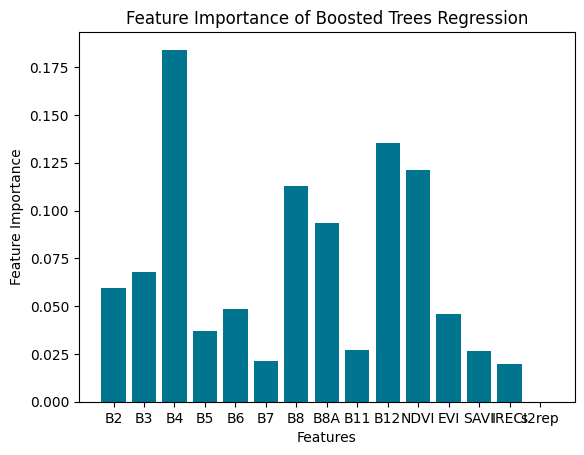

In [22]:
feature_importance(dt, "Boosted Trees")

The most crucial features seem to be B4, B12, NVDI, B8 and B8A. It is worth noting that the NDVI is a composition of the first and the last color channel.

Predictions vs True Values

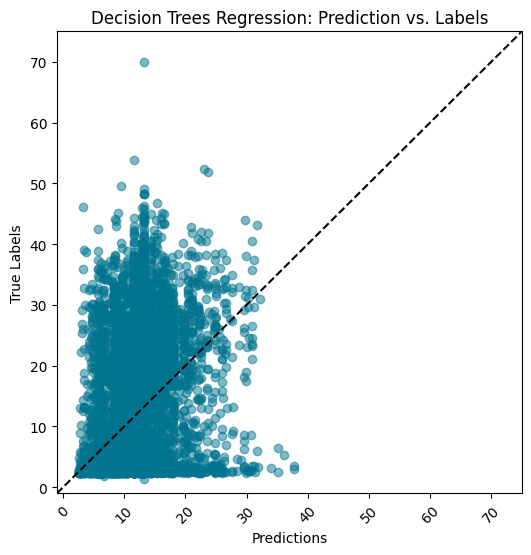

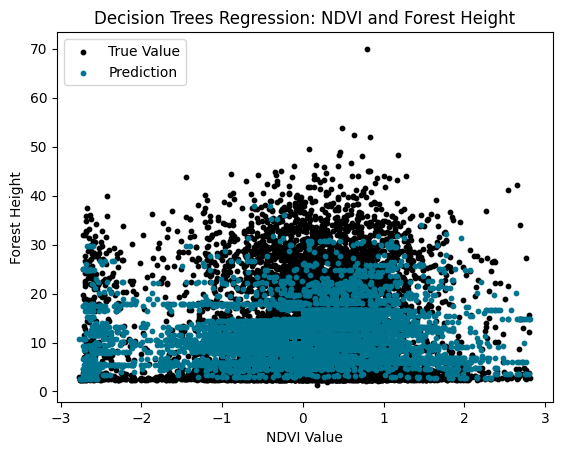

In [23]:
pred_vs_true(gs, "Decision Trees")

The decision trees regression is able to predict the whole spectrum of tree heights.

Predict exemplary image

In [24]:
%run forest_height/src/generate_data.py
%run forest_height/src/predict_data.py

<Figure size 640x480 with 0 Axes>

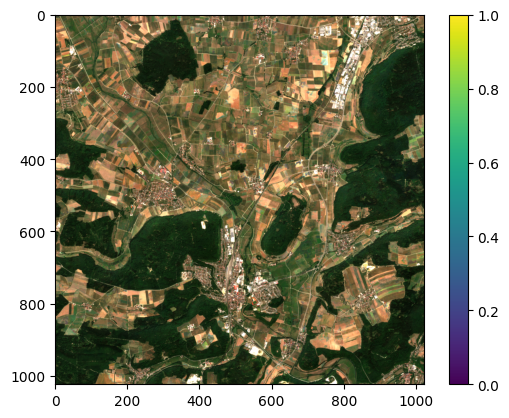

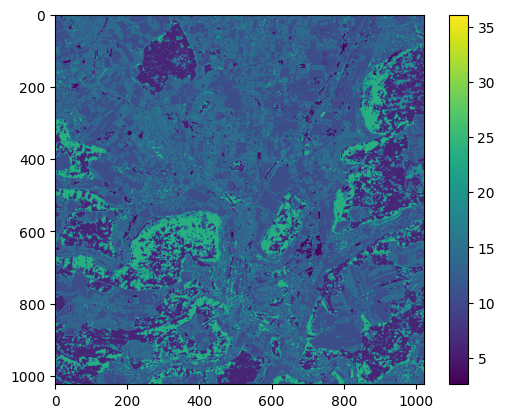

(array([[[ 356,  382,  454, ...,  684,  666,  655],
         [ 370,  378,  413, ...,  639,  637,  641],
         [ 374,  368,  389, ...,  614,  639,  644],
         ...,
         [ 245,  280,  308, ...,  247,  317,  320],
         [ 260,  298,  283, ...,  288,  307,  303],
         [ 248,  246,  239, ...,  293,  298,  314]],
 
        [[ 569,  593,  706, ...,  979,  991,  966],
         [ 567,  576,  642, ...,  966,  976,  977],
         [ 576,  588,  606, ...,  934,  971,  965],
         ...,
         [ 448,  500,  510, ...,  455,  525,  602],
         [ 462,  522,  531, ...,  508,  557,  556],
         [ 416,  426,  448, ...,  506,  584,  570]],
 
        [[ 515,  527,  664, ..., 1144, 1228, 1197],
         [ 490,  486,  572, ..., 1102, 1183, 1233],
         [ 476,  473,  480, ..., 1069, 1155, 1233],
         ...,
         [ 247,  294,  296, ...,  253,  286,  307],
         [ 268,  342,  310, ...,  278,  311,  309],
         [ 243,  244,  242, ...,  284,  295,  310]],
 
        ...,


In [27]:
pred_img(
    filepath=f'{path_images}{get_files(path_images)[3]}',
    features=['color_channels', 'NDVI', 'VI'],
    model=gs)